# A Dog's Dream Neighborhood

### The Dog Walkers: 
- Kendra Go (kag432@pitt.edu)
- Alexia Hillwig (amh541@pitt.edu)
- Angelina Riveros (anr463@pitt.edu)

### Introduction
Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

### Metric
Finding the best neighborhood in all of Pittsburgh is a difficult task when considering all of the complex variables of our needs and desires. We must consider our physical and mental health, accessibility to groceries, job opportunities, etc. All of this is just too complicated to keep in mind to find one answer. So, why don't we decide with the help of our more simple-minded companions: our dogs! 
Our canine companions were once our most loyal and helpful hunting buddies, so we should trust them once again for the hunt for the best neightborhood in Pittsburgh!

**<h2>Parks</h2>**

https://data.wprdc.org/dataset/parks

This dataset looks at parks located in the different neighborhoods of Pittsburgh. From the perspective of a dog, they would want to be in an area with numerous parks to play and run around in; thus, the neighborhood with the largest number of parks is the one considered the best as that means a wider range of options.

In [8]:
#importing pandas and everything else we need!
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
park_data = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d", index_col="_id")

park_data.head(5)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


Here's what the raw data looks like using the first 5 rows!

In [14]:
type = park_data['type'].str.contains("Park")

park = park_data[type]
park.head(15)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


Because some of the data under "type" aren't truly parks (like being listed as traffic island/median and building grounds instead), we need to filter it out so only parks show as the type.

In [48]:
park.loc[park['neighborhood'].str.contains("Oakland"), 'neighborhood'] = "Oakland"
park.loc[park['neighborhood'].str.contains("Squirrel Hill"), 'neighborhood'] = "Squirrel Hill"
print(park['neighborhood'].unique())

['Beechview' 'Crawford-Roberts' 'North Shore' 'Allegheny Center'
 'Central Business District' 'Central Northside' 'Bedford Dwellings'
 'South Side Slopes' 'South Side Flats' 'Lower Lawrenceville' 'Banksville'
 'Homewood North' 'Hazelwood' 'Bon Air' 'Oakland' 'Brighton Heights'
 'Brookline' 'Spring Garden' 'Lincoln-Lemington-Belmar' 'Windgap'
 'Troy Hill' 'Westwood' 'Perry South' 'Homewood West' 'Squirrel Hill'
 'Strip District' 'Arlington' 'Stanton Heights' 'Crafton Heights'
 'Upper Lawrenceville' 'East Carnegie' 'East Hills' 'East Liberty'
 'Allentown' 'Duquesne Heights' 'Mount Washington' 'Esplen' 'Fairywood'
 'Fineview' 'Garfield' 'Greenfield' 'Bloomfield' 'Perry North' 'Hays'
 'Elliott' 'Highland Park' 'Homewood South' 'Morningside'
 'Terrace Village' 'Larimer' 'Spring Hill-City View' 'Carrick'
 'Central Lawrenceville' 'Lincoln Place' 'Manchester' 'Marshall-Shadeland'
 'Sheraden' 'Beltzhoover' 'Point Breeze' 'Oakwood' 'Upper Hill'
 'New Homestead' 'Swisshelm Park' 'Bluff' 'Middle H

We're going to combine the different Oaklands (North, South, West, and Central) into one neighborhood called "Oakland" and the different sections of Squirrel Hill (South vs North) into simply "Squirrel Hill" to narrow down the possible options. Listed here are all the unique neighborhoods in our dataset!

In [17]:
best = park['neighborhood'].value_counts().reset_index(name='number of parks').head(20)
print(best)

             neighborhood  number of parks
0               Beechview                6
1       South Side Slopes                6
2               Troy Hill                5
3               Hazelwood                5
4        Mount Washington                5
5                 Elliott                4
6                Sheraden                4
7      Marshall-Shadeland                4
8            East Liberty                4
9        Brighton Heights                3
10  Spring Hill-City View                3
11    Squirrel Hill South                3
12             Bloomfield                3
13               Garfield                3
14            North Shore                3
15       Crawford-Roberts                3
16          South Oakland                3
17                Carrick                3
18    Upper Lawrenceville                3
19             Manchester                3


Afterwards, we need to figure out which neighborhood has the greatest number of parks. Listed here is the top 20 neighborhoods; from this, we can see that Beechview and South Side Slopes have the most parks with 6, closely followed by Troy Hill, Hazelwood, and Mount Washington with 5 parks.

<Axes: xlabel='neighborhood'>

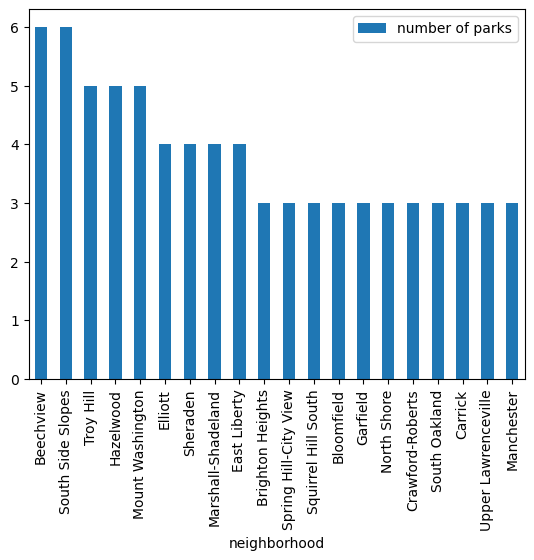

In [20]:
best.plot.bar(x='neighborhood', y='number of parks')

To make it a little bit easier to see, here is a visual representation of the neighborhoods and their corresponding number of parks. To conclude, solely based on my data, the best neighborhood(s) as a dog would be either Beechview or South Side Slopes.


---


## Dog Licenses
https://data.wprdc.org/dataset/allegheny-county-dog-licenses



This dataset keeps track of every dog licenses that is registered, keeping track of the type of dog, fur color, neuter/spay status and zipcode for each holder.
Fellow dog owners is a great marker for the kind of neighborhood we're looking for. Not only does that mean there are plenty of other dogs to play with, but it also implies that these neighborhoods offer some ammenities or include facilities suitable for dogs. 

After importing pandas, we can take a peek at what the raw data looks like:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

lic = pd.read_csv("dog-licenses.csv", sep=",")
lic.head(10)

,_id,LicenseType,Breed,Color,DogName,owner_zip,ExpYear,ValidDate
0,4119028,Dog Individual Neutered Male,COCKAPOO,BROWN,CHARLEY,15236,2024,2023-12-05T12:14:29
1,4119029,Dog Individual Neutered Male,TAG,WHITE/BLACK/BROWN,BOOMER,15090,2024,2023-12-05T12:15:12
2,4119030,Dog Senior Citizen or Disability Spayed Female,GER SHEPHERD,WHITE,ELLIE,15238,2024,2023-12-05T12:18:37
3,4119031,Dog Individual Neutered Male,MALTESE,WHITE,FURBY,15243,2024,2023-12-05T12:35:22
4,4119032,Dog Individual Neutered Male,MALTESE,WHITE,GIZMO,15243,2024,2023-12-05T12:35:22
5,4119033,Dog Individual Neutered Male,MIXED,WHITE/TAN,HUGO,15241,2024,2023-12-05T12:41:12
6,4119034,Dog Individual Male,RAT TERRIER,BROWN,BANJO,15221,2024,2023-12-05T12:43:57
7,4119035,Dog Individual Neutered Male,SIB HUSKY MIX,WHITE/BROWN,BOLT,15209,2024,2023-12-05T13:25:39
8,4119036,Dog Individual Neutered Male,AM PIT BULL TERRIER,BLACK,JED WAYNE,15229,2024,2023-12-05T13:33:49
9,4119037,Dog Individual Neutered Male,AM STAFF TERRIER,WHITE/BLACK,SAMSON,15229,2024,2023-12-05T13:34:45



##### With over 67,000 entries and 130 zipcodes in the dataset, lets narrow it down to those with the most registed licenses :


In [8]:
lic = pd.read_csv("dog-licenses.csv", sep=",")
best = lic['owner_zip'].value_counts().head(10)
print(best)

owner_zip
15237    2874
15108    2845
15044    2461
15102    2400
15235    2159
15146    2063
15236    1934
15101    1932
15239    1807
15136    1621
Name: count, dtype: int64



#### We've got some pretty strong leads, with the tope two have almost double the total registered in the 10th place zipcode. 

I don't feel right leaving it like this, however. I think that I can be narrowed down ever just a little bit more. I went through the liberty of removing just a few breeds. There are a few that I would avoid completely if I were a dog. This includes annoying dogs, some ugly dogs, prissy dogs, etc. **This is not objective -- I am very biased against dogs** 

In [11]:
breeds_to_exclude = ['CHIHUAHUA', 'American Bully', 'ROTTWEILER MIX', 'YORKSHIRE TERRIER',  'AM PITT BULL MIX', 'PUG', 'BICHON FRISE', 'AM ESKIMO DOG',
    'SCHNAUZER MIN', 'SHIH TZU', 'PUGGLE', 'SCHNOODLE', 'PUGGLE', 'PEKINGESE', 'POMERANIAN', 'MALTESE', 'BOSTON TERRIER', 'AM PIT BULL TERRIER', 
       'CHIHUAHUA MIX', 'SHIH TZU MIX', 'FRENCH BULLDOG', 'BOXER']

filtered_lic = lic[~lic['Breed'].isin(breeds_to_exclude)]
filt_best = filtered_lic['owner_zip'].value_counts().head(10)
print(filt_best)

owner_zip
15237    2376
15108    2312
15044    2085
15102    1979
15235    1615
15101    1609
15146    1607
15236    1560
15239    1451
15090    1353
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

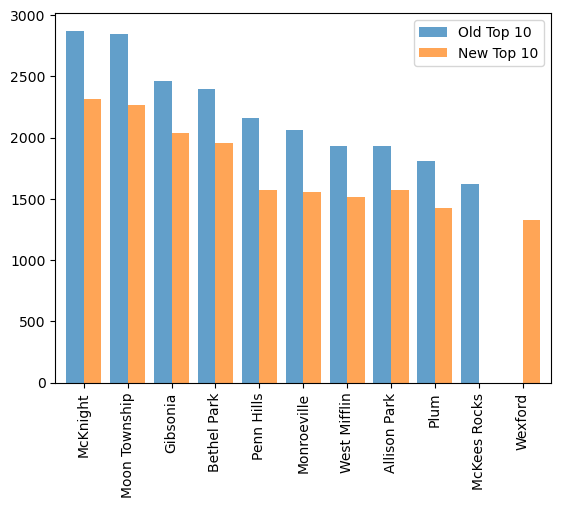

In [18]:
import matplotlib.pyplot as plt

best_dict = {"McKnight": 2874, "Moon Township": 2845, "Gibsonia": 2461, "Bethel Park": 2400,"Penn Hills": 2158,  "Monroeville": 2063, 
             "West Mifflin": 1934, "Allison Park": 1932, "Plum": 1807, "McKees Rocks": 1621}

filt_best_dict = {"McKnight": 2320, "Moon Township": 2265, "Gibsonia": 2037, "Bethel Park": 1955,"Allison Park": 1577,  "Penn Hills": 1572, 
             "Monroeville": 1560, "West Mifflin": 1517, "Plum": 1423, "Wexford": 1326}
compare = pd.DataFrame({'Old Top 10': best_dict, 'New Top 10': filt_best_dict})
plt.figure(figsize=(14, 6))
compare.plot(kind='bar', alpha=0.7, width=0.8)

plt.show()

### Sub-Conclusion

The neighborhoods of the McKnight and Moon Township areas are top two choices, holding the greatest number of registered dog licenses, even after the attempts to discriminate against certain breeds. 



---


<h2>Supermarkets!</h2>

https://data.wprdc.org/dataset/allegheny-county-supermarkets-convenience-stores
(Website used ^^^)

The dataset is has location information about supermarkets around allegheny county.  The dataset itself was created with Permit Data and County Fee.  This is important because how are we feeding the pets? Dogs need food and specifically supermarkets are necessary for high end foods dogs may eat to grow healthily.

Below is the raw data of the set but the first 10 entries

In [38]:
supermarket_data = pd.read_csv("supermarkets.csv", sep=",")
supermarket_data.head(11)

,_id,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,1,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,2,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,3,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,4,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,5,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
5,6,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137.0,40.367923,-79.780429,9.0,Convenience Store
6,7,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231.0,40.494177,-80.267208,9.0,Convenience Store
7,8,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store
8,9,201310080001,Plow & Hearth,Plow & Hearth LLC,9/25/2013,1710,Settlers Ridge Center Dr,PA,15205.0,40.440641,-80.149132,5.0,Convenience Store
9,10,43192,S & R Market,Mac's Convenience Stores LLC,1/11/1988,4915,2nd Ave,PA,15207.0,40.529076,-80.025577,5.0,Convenience Store


Since I only need the zip codes of the locations, specifcally, the most prominant zip codes. This is a list of the top 10 zip codes with the most supermarkets in them.

In [41]:
zip_counts =supermarket_data['Zip'].value_counts().head(20)
zip_counts.head(20)

Zip
15237.0    28
15146.0    22
15222.0    21
15132.0    19
15108.0    19
15210.0    18
15213.0    17
15136.0    17
15212.0    17
15219.0    17
15206.0    17
15235.0    16
15221.0    16
15236.0    16
15205.0    15
15227.0    15
15122.0    15
15090.0    12
15044.0    12
15217.0    11
Name: count, dtype: int64

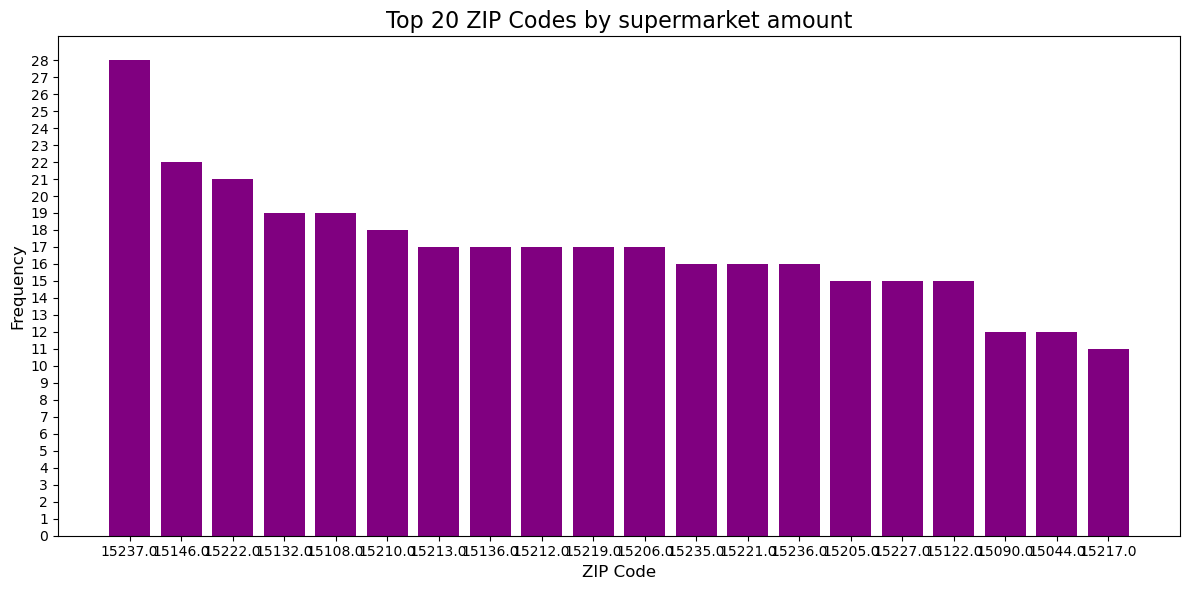

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(zip_counts.index.astype(str), zip_counts.values, color='purple')

plt.title("Top 20 ZIP Codes by supermarket amount", fontsize=16)
plt.xlabel("ZIP Code", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.yticks(range(0, max(zip_counts.values) + 1))

plt.show()

^^^ Here is a visualization of the data and you can see many zip codes share equal amounts of supermarkets but there is one zip code that outshines the others in the amount of markets which is 15237 with 28 entries. 

<h2>Using this information we can hopefully mark down a smaller amount of areas that are good for dogs!<h2/>

<h2>Conclusion</h2>

**Alexia** -

**Angelina** -

**Kendra** - Though our "best neighborhood" was Monroeville, I cannot personally confirm how true it is as I've never been there before, but I do trust our data, and if a dog would want to live there, then I probably would as well! My personal favorite Pittsburgh neighborhood would likely be Shadyside or Squirrel Hill, so our found "best neighborhood" is slightly different than the one(s) I like the most.